In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
df = pd.read_csv("data/King_County_House_prices_dataset.csv")

In [2]:
df_bedrooms_price1 = df.query("bedrooms >= 4 and bedrooms <= 6 and price >= 100000") # filter bedrooms ragne & price range
price = df[["price", "bedrooms"]]

,id
bedrooms,
4,6882
5,1601
6,272
7,38


<Figure size 720x720 with 0 Axes>

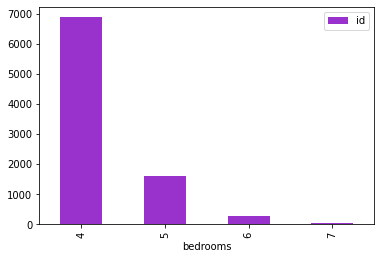

In [48]:
# how many houses there are that have 4 or 5 or 6  or 7 Bedrooms
df_bedrooms1 = df.query("bedrooms >= 4 and bedrooms <= 7")
groups = df_bedrooms1.groupby(['bedrooms']).count()
groups
plt.figure(figsize=(10, 10))
groups.plot.bar(y = "id", color='darkorchid')
display(groups[["id"]])

<AxesSubplot:xlabel='bedrooms'>

<Figure size 720x720 with 0 Axes>

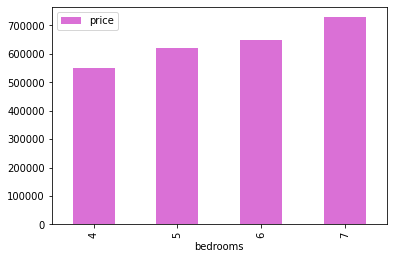

In [51]:
#what is the medien cost for each hause
df_bedrooms1 = df.query("bedrooms >= 4 and bedrooms <= 7")
groups = df_bedrooms1.groupby(['bedrooms']).median()
groups
plt.figure(figsize=(10, 10))
groups.plot.bar(y = "price", color='orchid')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

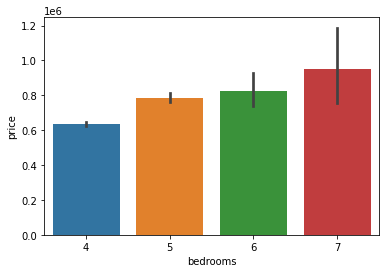

In [39]:
# the mean price for each house
sns.barplot(x="bedrooms", y="price", data=df_bedrooms1)

In [4]:
#all_bedrooms = df.query("bedrooms >= 4 and bedrooms <= 6")
all_bedrooms = all_bedrooms.count()
#sns.barplot(x="bedrooms",y="count", data=all_bedrooms)
#plt.show()
groups = df.groupby(['bathrooms'])['price'].count()
plt.figure(figsize=(10, 10))
all_bedrooms.plot.bar()

/Users/jonathanpreiss/neuefische/First-Project-Joni/.venv/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


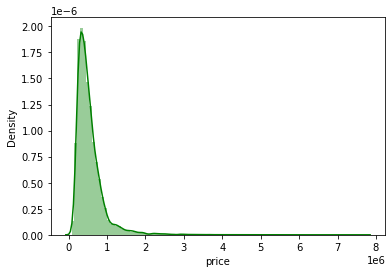

In [21]:
# Houses price distribution 
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

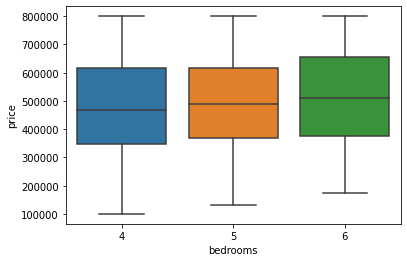

In [47]:
df_bedrooms_price1 = df.query("bedrooms >= 4 and bedrooms <= 6 and price <= 800000")
sns.boxplot(x="bedrooms", y="price", data=df_bedrooms_price1)
plt.show()

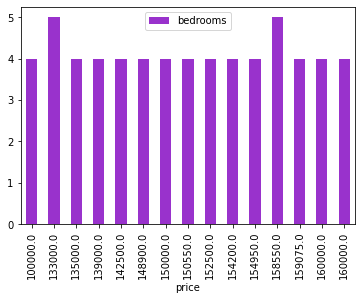

In [30]:

df_bedrooms = df.query("bedrooms == 4") # filter database for only 4 bedrooms
df_bedrooms_price = df.query("bedrooms >= 4 and bedrooms <= 6") # filter bedrooms ragne & price range
#rooms_price = df.groupby(["price", "bedrooms"]) # group price & bedrooms
df_bedrooms_price = df_bedrooms_price.sort_values("price", ascending=True)
df_bedrooms_price = df_bedrooms_price.head(15)
df_bedrooms_price.plot(x='price', y='bedrooms', kind='bar', color='darkorchid');


In [52]:

intercept, slope = results.params
intercept

fig, ax = plt.subplots(figsize=(8, 4))
x = df.price

ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between Price and Number of Bedroonms')

ax.plot(x, x*slope +intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("Bedrooms");
ax.set_xlabel("Price");

NameError: name 'results' is not defined

In [53]:
import statsmodels.api as sms
X = df[["bedrooms"]]
y = df.price
# Our model needs an intercept so we add a column of 1s:
X = sms.add_constant(X)
display(X.head())
display(y.head())
model = sms.OLS(y, X)
# use the data to calculate the intercept and slope
results = model.fit()
# return the output of the model
results.summary()

,const,bedrooms
0,1.0,3
1,1.0,3
2,1.0,2
3,1.0,4
4,1.0,3


0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:26:27   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#job_df = df[['bedrooms', 'price']]
#job_df = job_df[job_df.bedrooms.isin(['4', '5', '6'])].groupby(['price', 'bedrooms']).size().reset_index(name = 'size')

#pivot_df = pd.pivot_table(job_df, values='size', index=['price'], columns=['bedrooms']).reset_index()
#pivot_df.plot.bar(y=['4', '5', '6'], x='price', rot = 45, figsize=(10,10))
#pivot_df.head()